In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('h1n1_vaccine_prediction.csv') # reading the file in same DIR.

In [5]:
list(df.columns)

['unique_id',
 'h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

In [6]:
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    2

In [7]:
# now we are cheking if there are any missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
hou

In [8]:
# getting the variable distribution for the insights
print("\nTarget Variable Distribution:")
print(df['h1n1_vaccine'].value_counts())


Target Variable Distribution:
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64


In [9]:
# Data PreProcessing
#differentiaing the  features and target variable
X = df.drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']

# removing the otpional/ null/ empty
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_imputer = SimpleImputer(strategy='mean')
X[numerical_features] = numerical_imputer.fit_transform(X[numerical_features])
# Handling missing values for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_features] = categorical_imputer.fit_transform(X[categorical_features])

X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

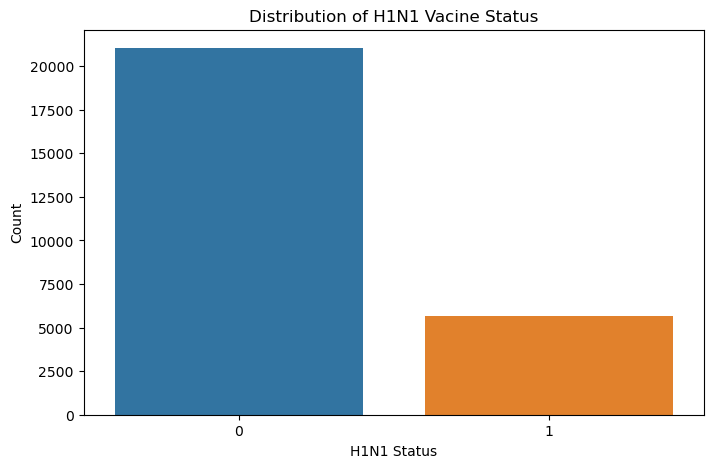

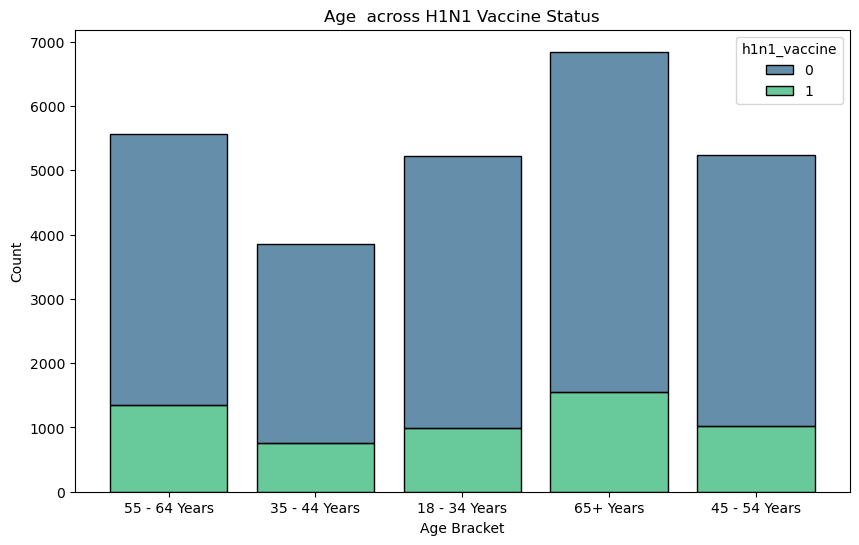

In [10]:
#Visualizing the model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Visualize the distribution of the target variable 'h1n1_vaccine'
plt.figure(figsize=(8, 5))
sns.countplot(x='h1n1_vaccine', data=df)
plt.title('Distribution of H1N1 Vacine Status')
plt.xlabel('H1N1 Status')
plt.ylabel('Count')
plt.show()

# age distribution across vaccine status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age_bracket', hue='h1n1_vaccine', multiple='stack', shrink=0.8, palette='viridis')
plt.title('Age  across H1N1 Vaccine Status')
plt.xlabel('Age Bracket')
plt.ylabel('Count')
plt.show()

In [11]:
#Splitting the data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#Testing the model for prediction
y_pred = model.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')
print(f"Model ACcuracy in the percentge heere:{accuracy*100:.4f} ")

Model Accuracy: 0.8532
Model ACcuracy in the percentge heere:85.3238 


In [15]:
# other evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4212
           1       0.77      0.44      0.56      1130

    accuracy                           0.85      5342
   macro avg       0.82      0.70      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [16]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[4059  153]
 [ 631  499]]
